## Introduction: Classification V/S Clustering

In [1]:
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = data.data
Y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

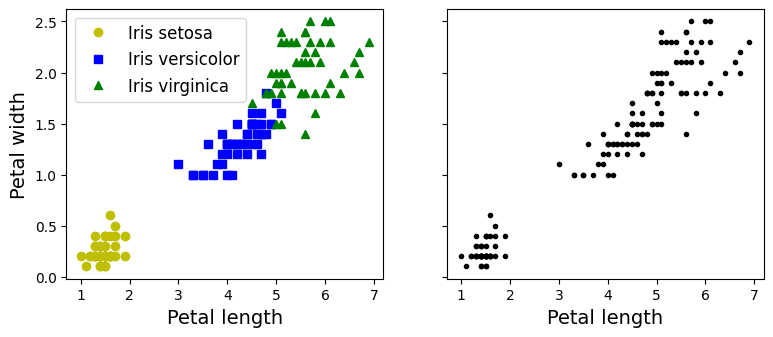

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,3.5))

plt.subplot(121)
plt.plot(X[Y==0, 2], X[Y==0,3], "yo", label="Iris setosa")
plt.plot(X[Y==1, 2], X[Y==1,3], "bs", label="Iris versicolor")
plt.plot(X[Y==2, 2], X[Y==2,3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)
plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)
plt.show()

In [5]:
from sklearn.datasets import make_blobs

In [6]:
import numpy as np

blob_centers = np.array(
    [[0.2,2.3],[-1.5,2.3],[-2.8,1.8],[-2.8,2.8],[-2.8,1.3]]
)
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])

In [7]:
X, Y = make_blobs(n_samples = 2000, centers = blob_centers, cluster_std = blob_std, random_state=7)

In [8]:
def plot_clusters(X, Y=None):
    plt.scatter(X[:,0], X[:, 1], c=Y , s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    

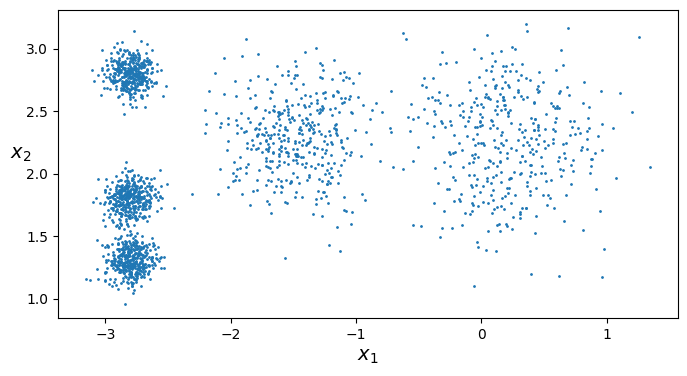

In [9]:
plt.figure(figsize=(8,4))
plot_clusters(X)
plt.savefig("blobs_plot.jpg")
plt.show()

In [10]:
X, Y

(array([[-2.69823941,  1.3454702 ],
        [-2.87459835,  1.8097575 ],
        [ 0.96077126,  1.17046777],
        ...,
        [-2.80303543,  2.72948115],
        [ 0.24057359,  2.40103109],
        [-2.63807768,  1.95621065]]),
 array([4, 2, 0, ..., 3, 0, 2]))

In [11]:
from sklearn.cluster import KMeans


In [12]:
k=5
kmeans= KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([2, 2, 4, ..., 1, 4, 2])

In [13]:
y_pred is kmeans.labels_

True

#### Predicting arbitary points Using K-Means Clustering

In [14]:
X_new= np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([0, 4, 1, 1])

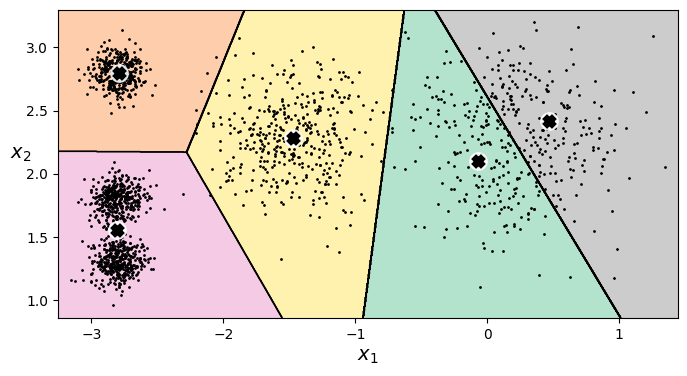

In [15]:
def plot_data(X):
    plt.plot(X[:,0], X[:,1], 'k.', markersize = 2)

def plot_centroid(centroids, weigthts=None, circle_color='w', cross_color='k'):
    if weigthts is not None:
        centroids = centroids[weigthts > weigthts.max()/10]
    plt.scatter(centroids[:,0], centroids[:,1], marker = 'o', s=30, linewidths=8, color = circle_color, zorder =10, alpha=0.9)
    plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s=50, linewidths=5, color = cross_color, zorder =11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
    cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
    linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroid(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)
plt.show()

## Function

####Syntax:
``` python
    def <name> (parameterList):
        <statement>
        return <value>


In [16]:
def mul(x,y):
    return x*y
x=eval(input("Enter 1st number:"))
y=eval(input("ENter 2nd Number"))
mul(x,y)

Enter 1st number: 10
ENter 2nd Number 20


200

In [17]:
def intersect(seq1, seq2):
    res=[]
    for x in seq1:
        if x in seq2:
            res.append(x)
    return res

In [18]:
intersect("cat", "bat")

['a', 't']

1. What is the point of coding functions?
2. At what time does Python create a function?
3. What does a function return if it has no return statement in it?
4. When does the code nested inside the function definition statement run?
5. What’s wrong with checking the types of objects passed into a function?

#### Scope

In [19]:
X =99

def func():
    X=88

Even though both variables are named X, their scopes make them different. The net
effect is that function scopes help to avoid name clashes in your programs and help to
make functions more self-contained program units.


In [2]:
def lastname(str):
    i=0
    while(str[i] != ' '):
        i+=1
        pass
    print(str[i+1: len(str)])

lastname("Raksha Sonawane")


Sonawane


In [1]:
Dict={}

def name_dict():
    str = input("Enter name")
    i=0
    while(str[i] != ' '):
        i+=1
        pass
    Dict[str[0:i]]=str[i+1:]
    return Dict

name_dict()

Enter name Raksha Sonawane


{'Raksha': 'Sonawane'}

In [53]:
#Write a program to remove space from start, end and in between
#[' ', 'j',' ', 'k', ' ']
def removeSpace():
    str = input("Enter a string:")
    start=0
    end = len(str)-1
    for i in range(len(str)):
        if (i==start and str[i]==' ') or (i==end and str[i]==' '):
            start+=1
            end-=1
            pass
        else:
            print(str[i], i)
removeSpace()

Enter a string:    s   s  


s 3
  4
  5
s 7
  8
  9
s  s  s     


In [62]:
# Write a program to add ing to end of string if string is ending with d or n

def add_ing(str):
    n=len(str)-1
    if (str[n]=='d' or str[n]=='n'):
        str=str+'ing'
    print(str)

add_ing("end")

ending


In [81]:
#if end of string is sion replace it with ship

def replace_sion(str):
    str1=''
    n=len(str)
    if str[n-4:n]=="sion":
        str1=str[0:n-4]+'ship'
        print(str1)
replace_sion("tension")

tenship


In [85]:
#print even and odd character of string

def oddCharacter(str):
    for i in range(len(str)):
        if i%2 == 0:
            print(str[i])
evenCharacter("Hello")   

H
l
o


In [ ]:
# write a program to replace first character of each word by capital letter

str="hello world"
for i in range(0, len(str)):
    str[]

In [104]:
chr(ord('h')-32)

'H'